In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from quickdraw import QuickDrawDataGroup

from bwb.distributions import DistributionDraw

Empezamos por obtener una imagen con la que instanciar la clase

In [2]:
# Definir el nombre del data set
DATASET_NAME = "face"

# Instanciar la clase
qd_data_group = QuickDrawDataGroup(DATASET_NAME, max_drawings=None)
print(f"{qd_data_group.drawing_count = }")

draw1 = qd_data_group.get_drawing(0)  # Obtener el primer dibujo
image1 = draw1.get_image()  # Obtener su imagen Pillow a través del método get_image

loading face drawings
load complete
qd_data_group.drawing_count = 161666


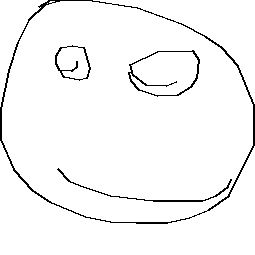

In [3]:
image1

Instanciamos la clase y mostramos la imagen de la carita.

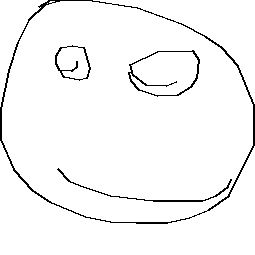

In [4]:
dd = DistributionDraw(image1, seed=42)
dd

Comprobamos que la matriz construida sea una distribución de probabilidad

In [5]:
assert dd.matrix.sum() == 1.0, "La matriz no suma 1.0"


Generamos sampleos a partir de la distribución de la carita

In [6]:
data = dd.rvs(100_000)
data[:10]

[(193, 38),
 (82, 194),
 (200, 223),
 (178, 22),
 (16, 162),
 (222, 151),
 (191, 33),
 (195, 41),
 (31, 196),
 (84, 144)]

Ploteamos el histograma generado por el sampleo de los datos de la carita

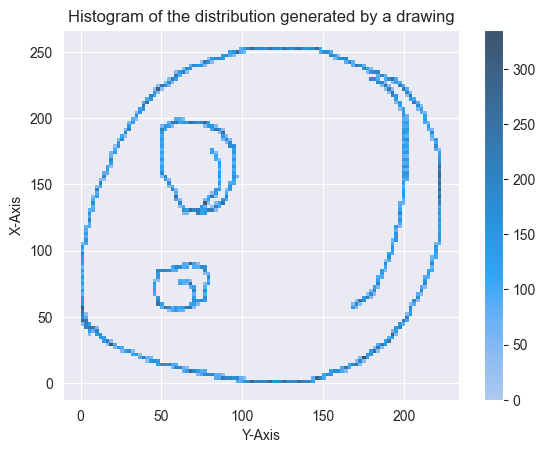

In [7]:
def plot_histogram(data: list[tuple[int, int]]):
    df = pd.DataFrame(data)
    sns.histplot(data=df, x=0, y=1, bins=100, cbar=True)
    plt.xlabel("Y-Axis")
    plt.ylabel("X-Axis")
    plt.title("Histogram of the distribution generated by a drawing")

plot_histogram(data)
plt.show()

Notamos que la distribución del histograma es la esperada. La imagen se encuentra rotada porque en la imagen original la matriz se empieza a generar a partir de la esquina superior izquierda, mientras que en la imagen la matriz se genera a partir de la esquina inferior izquierda.

In [8]:
dd.pdf((0, 29))

0.0

In [9]:
dd.pdf(data[:10])

array([0.00046083, 0.00046083, 0.00046083, 0.00046083, 0.00046083,
       0.00046083, 0.00046083, 0.00046083, 0.00046083, 0.00046083])

Intentemos ver como se construye una carita a partir de un arreglo. Empecemos importando el dataset original de caras como si fuera de arreglo.

In [10]:
arr = np.load(r"..\data\face.npy")
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Luego inicializaremos una instancia utilizando el inicializador alternativo

In [11]:
data = 255 - arr[0, :].reshape(28, 28)
dd_arr1 = DistributionDraw.fromarray(data, seed=42)
data = 255 - arr[1, :].reshape(28, 28)
dd_arr2 = DistributionDraw.fromarray(data, seed=42)

In [12]:
dd_arr1.matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

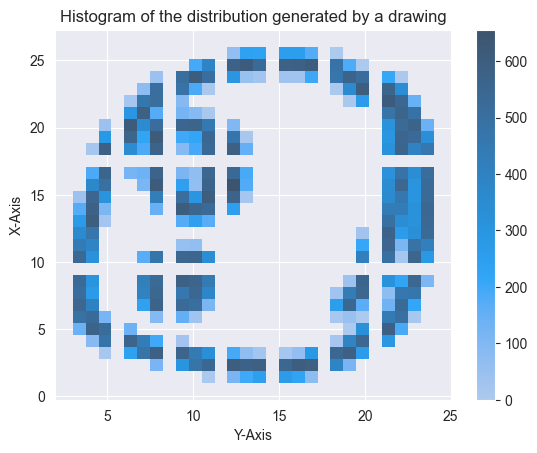

In [13]:
data = dd_arr1.rvs(100_000)
df = pd.DataFrame(data)
sns.histplot(data=df, x=0, y=1, bins=28, cbar=True)
plt.xlabel("Y-Axis")
plt.ylabel("X-Axis")
plt.title("Histogram of the distribution generated by a drawing")
plt.show()

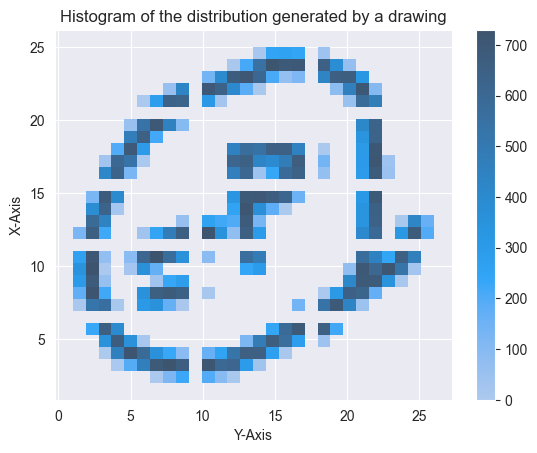

In [14]:
data = dd_arr2.rvs(100_000)
df = pd.DataFrame(data)
sns.histplot(data=df, x=0, y=1, bins=28, cbar=True)
plt.xlabel("Y-Axis")
plt.ylabel("X-Axis")
plt.title("Histogram of the distribution generated by a drawing")
plt.show()

Buscamos el soporte de la imagen, y lo hacemos pasar por la función de distribución.

In [15]:
support = dd_arr1.support
dd_arr1.pdf(support)

array([1.37588812e-03, 4.60133078e-03, 5.36821924e-03, 5.36821924e-03,
       5.36821924e-03, 5.23288598e-03, 4.42088643e-03, 3.49610917e-03,
       2.61644299e-03, 1.71422127e-03, 4.28555317e-04, 7.66888463e-04,
       5.43588587e-03, 5.50355250e-03, 3.94722003e-03, 3.06755385e-03,
       3.06755385e-03, 3.27055374e-03, 4.15021992e-03, 5.02988609e-03,
       5.72910793e-03, 5.75166347e-03, 5.63888576e-03, 4.01488666e-03,
       1.91722116e-03, 1.80444344e-04, 1.12777715e-04, 4.89455284e-03,
       5.21033044e-03, 1.03755498e-03, 2.25555430e-04, 1.12777715e-03,
       2.90966505e-03, 4.98477501e-03, 5.75166347e-03, 5.39077478e-03,
       3.22544265e-03, 5.18777490e-04, 2.21044322e-03, 5.75166347e-03,
       1.53377693e-03, 2.25555430e-05, 1.35333258e-03, 3.49610917e-03,
       5.59377467e-03, 5.50355250e-03, 2.97733168e-03, 1.80444344e-04,
       4.87199729e-03, 4.39833089e-03, 2.30066539e-03, 4.28555317e-03,
       4.19533100e-03, 1.69166573e-03, 1.01499944e-03, 1.53377693e-03,
      

In [16]:

import ot
import ot.plot

xs, xt = dd_arr1.support, dd_arr2.support

n, m = len(xs), len(xt)
a, b = dd_arr1.weights, dd_arr2.weights

norm = np.max([dd_arr1.shape, dd_arr2.shape])

M = ot.dist(np.array(xs) / (norm - 1), np.array(xt) / (norm - 1))
M.shape

(296, 264)

Text(0.5, 1.0, 'Cost matrix M')

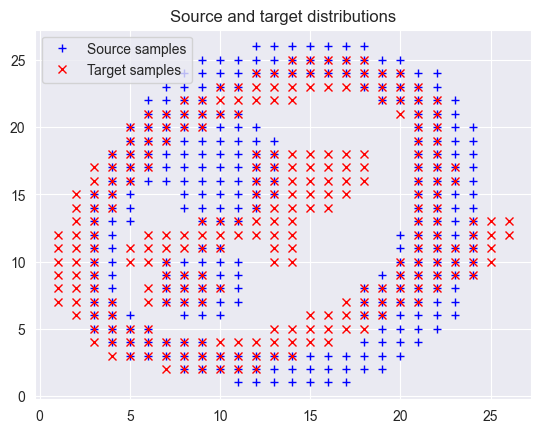

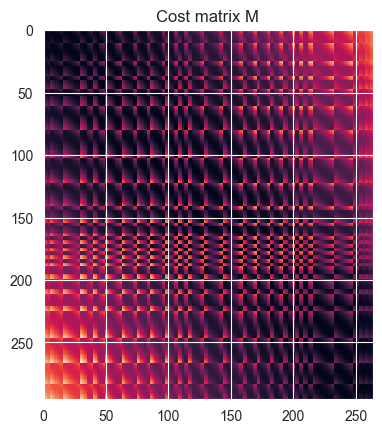

In [17]:
xs, xt = np.array(xs), np.array(xt)
plt.figure(1)
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(M, interpolation='nearest')
plt.title('Cost matrix M')

CPU times: total: 1.62 s
Wall time: 929 ms


Text(0.5, 1.0, 'OT matrix with samples')

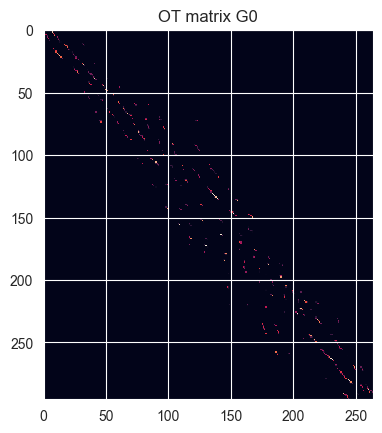

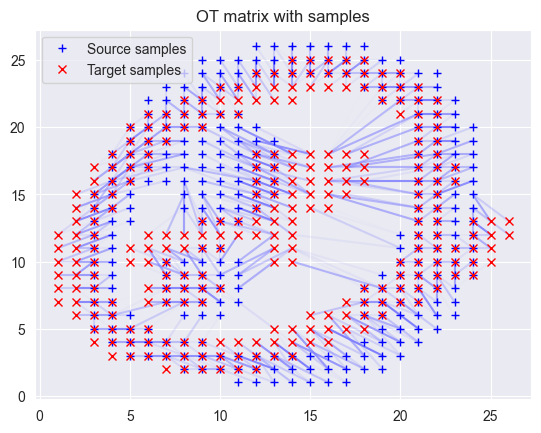

In [18]:
%%time
G0 = ot.emd(a, b, M, numThreads="max")

plt.figure(3)
plt.imshow(G0, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')

In [19]:
xs.shape, xt.shape

((296, 2), (264, 2))

In [20]:
# G0.prod(xt)
# xt
G0

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.41594454e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:

import ot
import ot.plot

xs, xt = dd_arr1.support, dd_arr2.support

n, m = len(xs), len(xt)
a, b = dd_arr1.pdf(dd_arr1.support), dd_arr2.pdf(dd_arr2.support)

norm = np.max([dd_arr1.matrix.shape, dd_arr2.matrix.shape])

M = ot.dist(np.array(xs) / (norm - 1), np.array(xt) / (norm - 1))
M.shape

(296, 264)

Text(0.5, 1.0, 'Cost matrix M')

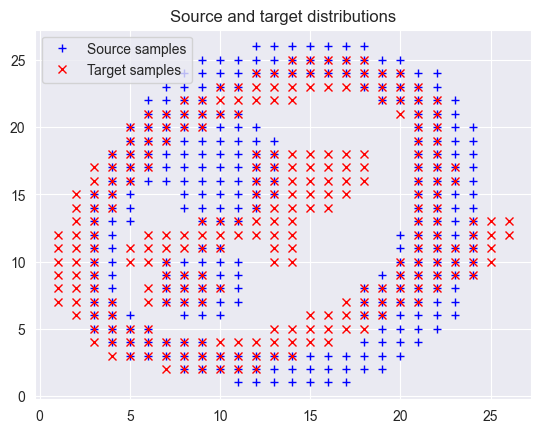

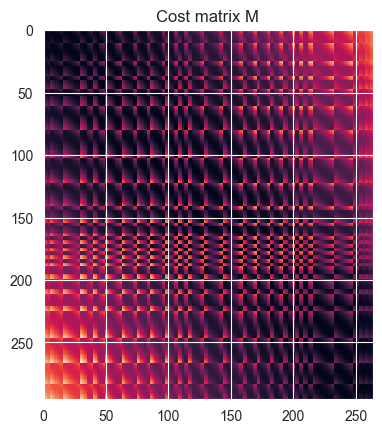

In [22]:
xs, xt = np.array(xs), np.array(xt)
plt.figure(1)
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(M, interpolation='nearest')
plt.title('Cost matrix M')

CPU times: total: 1.31 s
Wall time: 489 ms


Text(0.5, 1.0, 'OT matrix with samples')

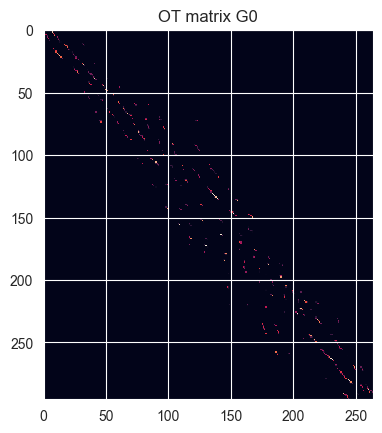

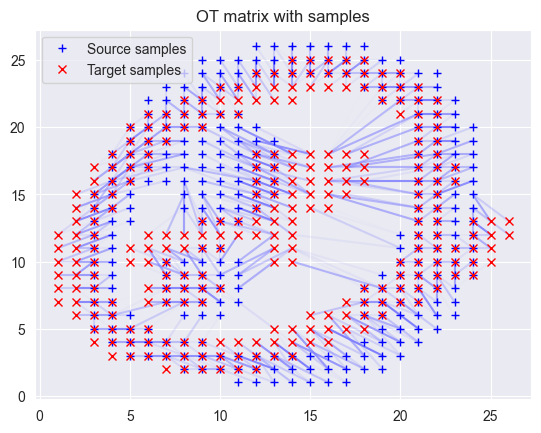

In [23]:
%%time
G0 = ot.emd(a, b, M, numThreads="max")

plt.figure(3)
plt.imshow(G0, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')